In [1]:
print("Lecture-20")

Lecture-20


### Resimlerin Sınıflandırılması: MNIST

Pixel --> picture element. Bilgisayar ekranı pixel'lerden oluşan bir matris biçimindedir. 1920x1080 -> 1920 sütun, 1080 satırlı bir pixel matrisinin olması anlamına gelmektedir. Her pixel diğerlerinden bağımsız olarak renklendirilmektedir. Pixel renkleri Kırmızı (red), Yeşil (Green), Mavi (Blue), tonsal bileşimlerle elde edilmektedir. Tonsal birleşimler 8 bitle ifade edilirler. Böylece [0, 255] arasında 256 değerden birini alabilirler. RGB biçiminde kısaltılan bu üç rengin toplam tonsal bileşimlerinin sayısı 256 * 256* 256 biçiminde yaklaşık 16 milyon tanedir. Örneğin Red = 255, Green = 0, Blue = 0 ise bu renk tam kırmızıdır. İşte dijityal resimler de bu biçimde pixel'lerden oluşmaktadır. Bir resim aslında belli bir sayıda pixel'den oluşan ve bu pixel'lerin farklı renklerinden oluşan bir byte yığınıdır.

Bir resim bilindiği gibi pixel'lerden oluşmaktadır. Her pixel'inde bir renk bileşenleri vardır. RGB. Transparanlık. Transparanlık 255 ise arka plan tam saydamsız, 0 ise tam saydam anlamına gelmektedir. 

Gri tonlamalı resim aslında grinin tonlarından oluşan resimdir. Gri tonlamalı resimlerde her bir pixel RGB ile değil tek bir değer ile ifade edilir. R = G = B pizel renklerinden oluşan resimdir. Böylece gri tonlamalı resimde her pixel üç byte'la değil bir byte'la kodlanabilmektedir. Gri tonlamalı resimleri siyah beyaz (monochrome) resimlerle karıştırmamak gerekir. Siyah-beyaz bir resimnde her pixel 1 bit ile ifade edilmektedir. 

Peki normal RGB bir resim gri tonlamalı biçime dönüştürülebilir mi? Evet. iKi teknik var. Bunlardan biri her pixel'in RGB değerlerinin ortalaması alınır. 

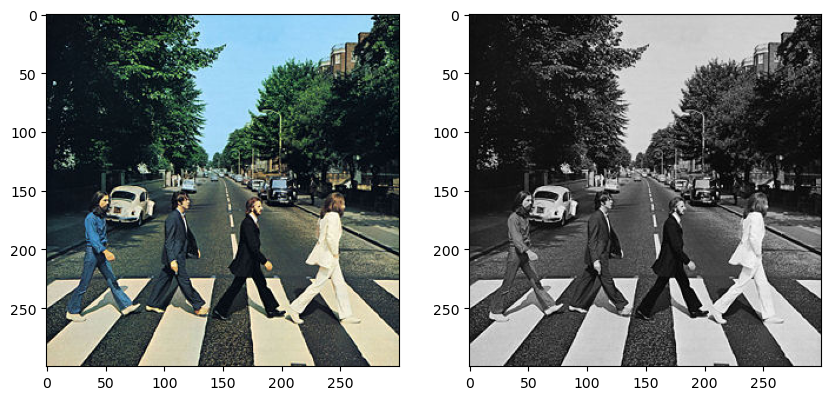

In [3]:
import numpy as np
import matplotlib.pyplot as plt

img_data = plt.imread('Beatles_Abbey_Road.jpg')
gray_img_data = np.mean(img_data, axis=2)

figure = plt.gcf()
figure.set_size_inches((10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_data)
plt.subplot(1, 2, 2)
plt.imshow(gray_img_data, cmap='gray')
plt.show()

Diğer bir yöntemde pixel'in RGB değerleri önce özel değerlerle çarpılıp sonra onların ortalamalarını alınmaktadır.
R = 0.3, G = 0.59, B = 0.11

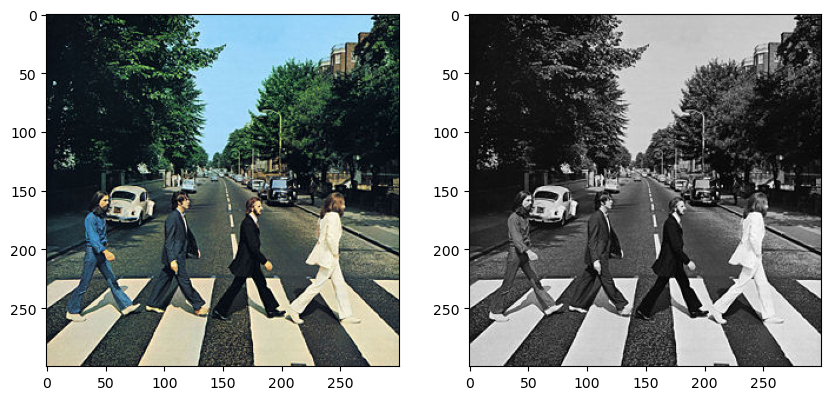

In [5]:
import numpy as np
import matplotlib.pyplot as plt

img_data = plt.imread('Beatles_Abbey_Road.jpg')
gray_img_data = np.average(img_data, weights=[0.3, 0.59, 0.11], axis=2)


figure = plt.gcf()
figure.set_size_inches((10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_data)
plt.subplot(1, 2, 2)
plt.imshow(gray_img_data, cmap='gray')
plt.show()

MNIST (Modified National Institue of Standards and Technology). keras.mnist -> her biri 28x28'lik bir "gri tonlamalı (grayscale)" bitmap'ten oluşan pek çok resim bulunmaktadır. Bu resimlerde 0'dan 9'a kadar saytıların elle çizilmiş şekilleri vardır. Dolayısıyla modelin girdi katmanı 28 * 28 = 784 nörondan oluşur. Çıktı katmanı 10 nörondan oluşmaktadır.

https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

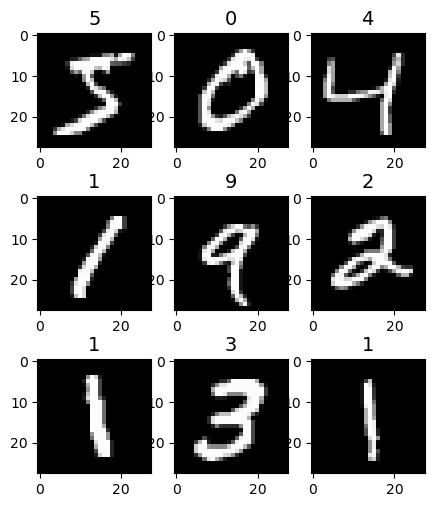

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df_training = pd.read_csv('mnist/mnist_train.csv')
df_test = pd.read_csv('mnist/mnist_test.csv')

training_dataset_x = df_training.iloc[:, 1:].to_numpy()
training_dataset_y = df_training.iloc[:, 0].to_numpy() # label

test_dataset_x = df_test.iloc[:, 1:].to_numpy()
test_dataset_y = df_test.iloc[:, 0].to_numpy()

plt.figure(figsize=(5,6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.title(str(training_dataset_y[i]), fontsize=14)
    plt.imshow(training_dataset_x[i].reshape(28,28), cmap='gray')
plt.show()

In [9]:
# min-max ölçeklemesi yapmamız gerekir. Pixel değerleri 0 ile 255 arasında olduğuna göre Min-Max ölçeklemesi doğrudan bu değerlerin 255'e bölünmesiyle elde edilebilir.add()

training_dataset_x = training_dataset_x / 255
test_dataset_x = test_dataset_x / 255



MNIST çok sınıflı bir lojistik regresyon problemi olduğu için çıktı değerlerinin one hot encoding yapılması gerekmektedir. 

In [10]:
from tensorflow.keras.utils import to_categorical

ohe_training_dataset_y = to_categorical(training_dataset_y)
ohe_test_dataset_y = to_categorical(test_dataset_y)

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='MNIST')
model.add(Dense(256, activation='relu', input_dim=784, name='Hidden-1'))
model.add(Dense(128, activation='relu', name='Hidden-2'))
model.add(Dense(10, activation='softmax', name='Output'))

model.summary()

Model: "MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 256)               200960    
                                                                 
 Hidden-2 (Dense)            (None, 128)               32896     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(training_dataset_x, ohe_training_dataset_y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2266 - categorical_accuracy: 0.9326 - val_loss: 0.1321 - val_categorical_accuracy: 0.9613
Epoch 2/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1013 - categorical_accuracy: 0.9706 - val_loss: 0.1094 - val_categorical_accuracy: 0.9693
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0750 - categorical_accuracy: 0.9785 - val_loss: 0.1132 - val_categorical_accuracy: 0.9707
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0576 - categorical_accuracy: 0.9843 - val_loss: 0.1267 - val_categorical_accuracy: 0.9727
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0464 - categorical_accuracy: 0.9873 - val_loss: 0.1265 - val_categorical_accuracy: 0.9757
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0400 - categorical_accuracy: 0.9892 - val_loss: 0.1242 - val_categorical_accuracy:

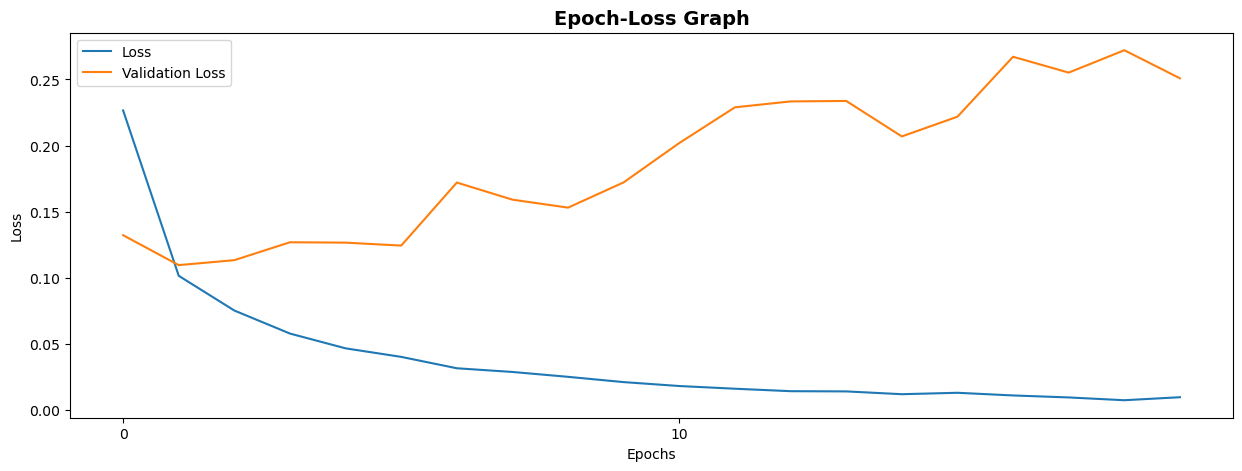

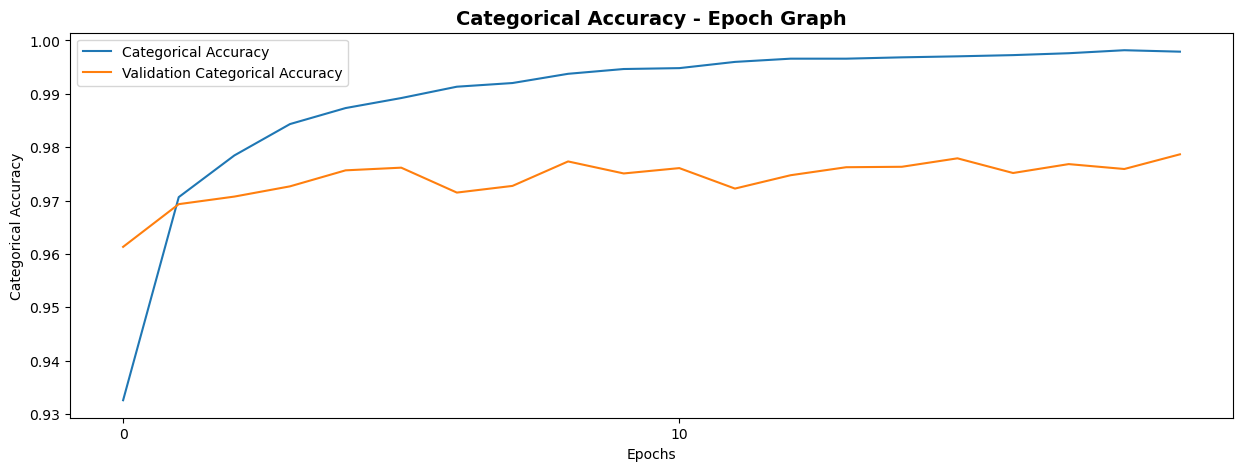

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.title('Epoch-Loss Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0, len(hist.epoch) + 10, 10))

plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Categorical Accuracy - Epoch Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
plt.xticks(range(0, len(hist.epoch) + 10, 10))

plt.plot(hist.epoch, hist.history['categorical_accuracy'])
plt.plot(hist.epoch, hist.history['val_categorical_accuracy'])
plt.legend(['Categorical Accuracy', 'Validation Categorical Accuracy'])
plt.show()

In [19]:
eval_result = model.evaluate(test_dataset_x, ohe_test_dataset_y)

for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]}: {eval_result[i]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2199 - categorical_accuracy: 0.9790
loss: 0.21989889442920685
categorical_accuracy: 0.9789999723434448


In [27]:
import numpy as np
import glob
from PIL import Image

for path in glob.glob('mnist/test_images/*.png'):
    image = Image.open(path)
    image = image.resize((28,28))

    image_data = np.array(image)
    image_data = image_data[..., :3] # rgb

    gray_scaled_image_data = np.average(image_data, axis=2, weights=[0.3, 0.59, 0.11])
    
    gray_scaled_image_data = gray_scaled_image_data / 255
    predict_result = model.predict(gray_scaled_image_data.reshape(1, 784))
    result = np.argmax(predict_result)
    print(f'{path}: {result}')

1/1 [==============================] - 0s 72ms/step
mnist/test_images\Screenshot_10.png: 4
1/1 [==============================] - 0s 35ms/step
mnist/test_images\Screenshot_11.png: 3
1/1 [==============================] - 0s 34ms/step
mnist/test_images\Screenshot_12.png: 1
1/1 [==============================] - 0s 31ms/step
mnist/test_images\Screenshot_13.png: 2
1/1 [==============================] - 0s 33ms/step
mnist/test_images\Screenshot_6.png: 2
1/1 [==============================] - 0s 32ms/step
mnist/test_images\Screenshot_7.png: 8
1/1 [==============================] - 0s 31ms/step
mnist/test_images\Screenshot_8.png: 5
1/1 [==============================] - 0s 36ms/step
mnist/test_images\Screenshot_9.png: 5


tensorflow.keras.datasets içerisinde mnist modülü